In [1]:
#!/usr/bin/env python3
#
# Compares counts of species made by taxonomists with that of the classifier
#

import sys, os, argparse, re, glob, pathlib, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
# from src import helper_data as hd, helper_models as hm
import predict as pr



#
# Input parameters (hardcoded, for the moment)
#
modelnames	= ['/local/kyathasr/plankifier-master/trained-models/mobilenet3/keras_model.h5']
weightnames	= ['/local/kyathasr/plankifier-master/trained-models/mobilenet3/bestweights.hdf5']
testdirs	= glob.glob('/local/kyathasr/plankifier-master/data/1_zooplankton_0p5x/validation/counts/year_*/*/0000000000_subset_static_html/images/00000/')
testimages	= glob.glob('/local/kyathasr/plankifier-master/data/1_zooplankton_0p5x/validation/counts/year_*/*/0000000000_subset_static_html/images/00000/*')
ensMethod	= 'majority'
threshold	= 0.7



In [ ]:

nimages = len(testimages)
print('There are {} images in total'.format(nimages) )


#
# Produce classifier predictions
#

ensembler=pr.Censemble(modelnames  	= modelnames, 
						testdirs	= testdirs, 
						weightnames	= weightnames,
						screen		= False
						)
ensembler.MakePredictions()
ensembler.Ensemble(method=ensMethod, absthres=threshold)

# Create a dataframe with the classification counts
histo_cla = Counter(ensembler.guesses[:,1])
df_cla=pd.DataFrame(histo_cla.values(), index=histo_cla.keys(), columns=['cla'])



There are 30663 images in total


According to the taxonomists, there are 29865 images


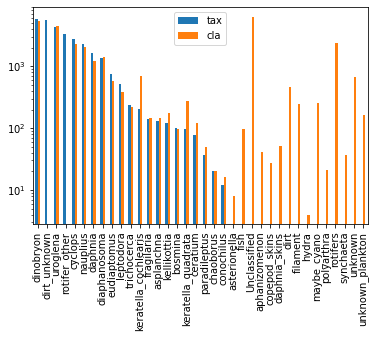

In [3]:


#
# Data from taxonomists
#
df_tax=pd.read_csv('/local/kyathasr/plankifier-master/data/1_zooplankton_0p5x/validation/counts/counts_cleaned.csv', sep=';',encoding="ISO-8859-1")                                                                             

useless_cols = ['name_folder', 'ID','timestamp','year', 'month', 'day', 'hour', 'name_counter', 'total_ROI', 'comments']
classes = list(set(df_tax.columns)-set(useless_cols))
df_tax = pd.DataFrame(df_tax[classes].sum().values, index=df_tax[classes].sum().index, columns=['tax'])
print('According to the taxonomists, there are {} images'.format(df_tax.sum().values.item()))



#
# Concatenate and plot the two histograms
#

df=pd.concat([df_cla, df_tax], axis=1, ignore_index=False, sort=True)
plt.figure(figsize=(30,30))
df[['tax','cla']].sort_values(by='tax', ascending=False).plot.bar(logy=True)
plt.show()

